In [166]:
import numpy as np
import matplotlib.pyplot as plt

#Maximize f1 and f2
def objective_function(x):
    # Calculate the objective function values for a given solution x
    f1 = x[0]**2 + x[1]**2
    f2 = (x[0] - 5)**2 + (x[1] - 5)**2
    return (f1, f2)

def initialize_population(n, bounds):
    # Generate n random solutions within the given bounds
    population = []
    for i in range(n):
        x = np.random.uniform(bounds[0], bounds[1], size=2)
        population.append(x)
    return population
# Function for initial search


def evolve(population, bounds, max_evaluations):
    # Evolve the population using a multi-objective evolutionary algorithm
    num_evaluations = 0
    while num_evaluations < max_evaluations:
        # Select two parents using tournament selection
        parent1 = tournament_selection(population)
        parent2 = tournament_selection(population)
        
        # Perform crossover to produce two offspring
        offspring1, offspring2 = crossover(parent1, parent2, bounds)
        
        # Perform mutation on the offspring
        offspring1 = mutate(offspring1, bounds)
        offspring2 = mutate(offspring2, bounds)
        
        # Evaluate the objective function for the offspring
        f1, f2 = objective_function(offspring1)
        num_evaluations += 1
        offspring1_fitness = (f1, f2)
        
        f1, f2 = objective_function(offspring2)
        num_evaluations += 1
        offspring2_fitness = (f1, f2)
        
        # Update the population using non-dominated sorting
        population = update_population(population, offspring1, offspring1_fitness, offspring2, offspring2_fitness)
        
    # Return the final population
    return population

def tournament_selection(population):
    # Select a solution from the population using tournament selection
    # (randomly choose two solutions and return the better one)
    x1 = population[np.random.randint(len(population))]
    x2 = population[np.random.randint(len(population))]
    f1, f2 = objective_function(x1)
    g1, g2 = objective_function(x2)
    if dominates(f1, f2, g1, g2):
        return x1
    elif dominates(g1, g2, f1, f2):
        return x2
    else:
        return x1 if np.random.uniform() < 0.5 else x2

def crossover(x1, x2, bounds):
    # Perform crossover to produce two offspring
    alpha = np.random.uniform(0, 1, size=2)
    offspring1 = alpha*x1 + (1-alpha)*x2
    offspring2 = alpha*x2 + (1-alpha)*x1
    offspring1 = np.clip(offspring1, bounds[0], bounds[1])
    offspring2 = np.clip(offspring2,bounds[0], bounds[1])
    return (offspring1, offspring2)

def mutate(x, bounds):
# Perform mutation on a solution
    x = x + np.random.normal(0, 0.1, size=2)
    x = np.clip(x, bounds[0], bounds[1])
    return x

def update_population(population, offspring1, offspring1_fitness, offspring2, offspring2_fitness):
    # Update the population using non-dominated sorting
    new_population = []
    for x in population:
        f1, f2 = objective_function(x)
        if not dominates(offspring1_fitness[0], offspring1_fitness[1], f1, f2) and not dominates(f1, f2, offspring1_fitness[0], offspring1_fitness[1]):
            new_population.append(x)
    if not dominates(offspring1_fitness[0], offspring1_fitness[1], offspring2_fitness[0], offspring2_fitness[1]):
        new_population.append(offspring1)
    if not dominates(offspring2_fitness[0], offspring2_fitness[1], offspring1_fitness[0], offspring1_fitness[1]):
        new_population.append(offspring2)
    return new_population

def dominates(f1, f2, g1, g2):
# Check if solution x dominates solution y
    return (f1 < g1 and f2 <= g2) or (f1 <= g1 and f2 < g2)

# Set the total round of evaluation and evolution
num_total = 10000;

# Set the number of search better solutions on the initial set
num_search = 1000;

#Set the number of evaluations for initialization
num_evaluations_for_initialization = 1000

#Set the bounds for the decision variables
bounds = (-10, 10)

#Generate the initial population
population = initialize_population(1000, bounds)

#Evolve the population
final_population = evolve(population, bounds, num_evaluations_for_initialization)

#Print the final population
#print(final_population)

#This code defines a MOEA that uses tournament selection, crossover, and mutation to evolve a population of solutions.
#The user can specify the number of evaluations to be used for initialization by setting the `num_evaluations_for_initialization` variable. 
#The initial population is generated using the `initialize_population` function, which generates random solutions within the given bounds. 
#The MOEA is then run using the `evolve` function, which performs the optimization process and returns the final population of solutions.

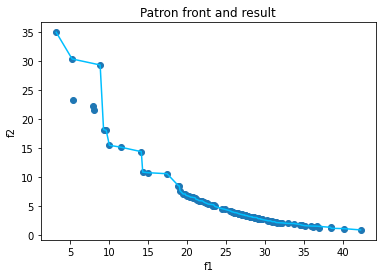

In [169]:
# Output the result of this population
object_result = []
temp = 0
while(temp < len(final_population)):
    object_result.append(objective_function(final_population[temp]))
    temp = temp + 1
#print(object_result)
px = []
py = []
temp = 0
while(temp < len(final_population)):
    px.append(object_result[temp][0])
    py.append(object_result[temp][1])
    temp = temp + 1

def pareto_frontier(Xs, Ys, maxX = True, maxY = True):
# Sort the list in either ascending or descending order of X
    myList = sorted([[Xs[i], Ys[i]] for i in range(len(Xs))], reverse=maxX)
# Start the Pareto frontier with the first value in the sorted list
    p_front = [myList[0]]    
# Loop through the sorted list
    for pair in myList[1:]:
        if maxY: 
            if pair[1] >= p_front[-1][1]: # Look for higher values of Y…
                p_front.append(pair) # … and add them to the Pareto frontier
        else:
            if pair[1] <= p_front[-1][1]: # Look for lower values of Y…
                p_front.append(pair) # … and add them to the Pareto frontier
# Turn resulting pairs back into a list of Xs and Ys
    p_frontX = [pair[0] for pair in p_front]
    p_frontY = [pair[1] for pair in p_front]
    return p_frontX, p_frontY
  
Xs = px
Ys = py
# get your data from somewhere to go here
# Find lowest values for cost and highest for savings
p_front = pareto_frontier(Xs, Ys, maxX = True, maxY = True) 
# Plot a scatter graph of all results
# plt.scatter(Xs, Ys)
# Then plot the Pareto frontier on top
# Get true front
true_front = []
temp = 0
while(temp < len(p_front[0])):
    true_front.append([p_front[0][temp], p_front[1][temp]])
    temp = temp + 1    
    

plt.scatter(px ,py)
plt.plot(p_front[0], p_front[1], color='deepskyblue')
plt.xlabel('f1')
plt.ylabel('f2')
plt.title('Patron front and result')
plt.show()



In [ ]:
from sklearn.metrics import euclidean_distances

def pareto_optimality(solutions, objectives):
    """
    Check if a set of solutions is Pareto optimal.
    
    Parameters
    ----------
    solutions : array-like, shape = [n_samples, n_features]
        The solutions to check for Pareto optimality.
    objectives : array-like, shape = [n_samples, n_objectives]
        The objective values for the solutions.
        
    Returns
    -------
    pareto_optimal : array-like, shape = [n_samples]
        A boolean array indicating which solutions are Pareto optimal.
    """
    # Check if each solution is dominated by any other solution
    pareto_optimal = np.ones(solutions.shape[0], dtype=bool)
    for i, solution in enumerate(solutions):
        for j, other_solution in enumerate(solutions):
            if (objectives[i] < objectives[j]).all() and (objectives[i] <= objectives[j]).any():
                pareto_optimal[i] = False
                break
    return pareto_optimal

import numpy as np

def hypervolume(solutions, objectives, reference_point):
    """
    Calculate the hypervolume of a set of solutions using the "naive" approach.
    
    Parameters
    ----------
    solutions : array-like, shape = [n_samples, n_features]
        The solutions.
    objectives : array-like, shape = [n_samples, n_objectives]
        The objective values for the solutions.
    reference_point : array-like, shape = [n_objectives]
        The reference point for the hypervolume calculation.
        
    Returns
    -------
    hypervolume : float
        The hypervolume of the solutions.
    """
    def dominates(x, y):
        """
        Check whether x dominates y.
        
        Parameters
        ----------
        x : array-like, shape = [n_objectives]
            The objective values for the first solution.
        y : array-like, shape = [n_objectives]
            The objective values for the second solution.
            
        Returns
        -------
        dominated : bool
            True if x dominates y, False otherwise.
        """
        dominated = all(x_i <= y_i for x_i, y_i in zip(x, y)) and any(x_i < y_i for x_i, y_i in zip(x, y))
        return dominated
    
    # Initialize the hypervolume to the reference point
    hypervolume = np.prod(reference_point)
    
    # Iterate over the solutions and subtract the volume of the dominated region
    for i in range(objectives.shape[0]):
        for j in range(i+1, objectives.shape[0]):
            if dominates(objectives[i], objectives[j]):
                # Calculate the volume of the region dominated by i
                volume = np.prod(np.maximum(reference_point - objectives[i], 0))
                hypervolume -= volume
            elif dominates(objectives[j], objectives[i]):
                # Calculate the volume of the region dominated by j
                volume = np.prod(np.maximum(reference_point - objectives[j], 0))
                hypervolume -= volume
    
    return hypervolume

    
def epsilon_indicator(solutions, objectives, reference_point):
    """
    Calculate the additive epsilon indicator of a set of solutions.
    
    Parameters
    ----------
    solutions : array-like, shape = [n_samples, n_features]
        The solutions.
    objectives : array-like, shape = [n_samples, n_objectives]
        The objective values for the solutions.
    reference_point : array-like, shape = [n_objectives]
        The reference point for the epsilon indicator calculation.
        
    Returns
    -------
    epsilon : float
        The additive epsilon indicator of the solutions.
    """
    # Calculate the distances between the solutions and the reference point
    distances = euclidean_distances(objectives, reference_point.reshape(1, -1))
    
    # Calculate the epsilon indicator
    epsilon = (distances.max(axis=1) - distances.min(axis=1)).sum() / distances.shape[0]
    
    return epsilon

def inverted_generational_distance(solutions, objectives, reference_front):
    """
    Calculate the inverted generational distance of a set of solutions.
    
    Parameters
    ----------
    solutions : array-like, shape = [n_samples, n_features]
        The solutions.
    objectives : array-like, shape = [n_samples, n_objectives]
        The objective values for the solutions.
    reference_front : array-like, shape = [n_samples, n_objectives]
        The reference Pareto optimal front.
        
    Returns
    -------
    igd : float
        The inverted generational distance of the solutions.
    """
    # Calculate the distances between the solutions and the reference front
    distances = euclidean_distances(objectives, reference_front)
    
    # Calculate the minimum distance for each solution
    min_distances = distances.min(axis=1)
    
    # Calculate the inverted generational distance
    igd = min_distances.sum() / min_distances.shape[0]
    
    return igd

def spacing(solutions, objectives):
    """
    Calculate the spacing of a set of solutions.
    
    Parameters
    ----------
    solutions : array-like, shape = [n_samples, n_features]
        The solutions.
    objectives : array-like, shape = [n_samples, n_objectives]
        The objective values for the solutions.
        
    Returns
    -------
    spacing : float
        The spacing of the solutions.
    """
    # Calculate the distances between the solutions
    distances = euclidean_distances(objectives)
    
    # Calculate the average distance between each solution and its nearest neighbors
    nearest_neighbors = np.sort(distances, axis=1)[:, 1:3]
    spacing = nearest_neighbors.mean()
    
    return spacing

def spread(solutions, objectives):
    """
    Calculate the spread of a set of solutions.
    
    Parameters
    ----------
    solutions : array-like, shape = [n_samples, n_features]
        The solutions.
    objectives : array-like, shape = [n_samples, n_objectives]
        The objective values for the solutions.
        
    Returns
    -------
    spread : float
        The spread of the solutions.
    """
    # Calculate the centroid of the solutions
    centroid = objectives.mean(axis=0)
    
    # Calculate the distances between the solutions and the centroid
    distances = euclidean_distances(objectives, centroid.reshape(1, -1))
    
    # Calculate the spread as the average distance to the centroid
    spread = distances.mean()
    
    return spread

def mean_objective_vector_difference(solutions, objectives, reference_front):
    """
    Calculate the mean objective vector difference of a set of solutions.
    
    Parameters
    ----------
    solutions : array-like, shape = [n_samples, n_features]
        The solutions.
    objectives : array-like, shape = [n_samples, n_objectives]
        The objective values for the solutions.
    reference_front : array-like, shape = [n_samples, n_objectives]
        The reference Pareto optimal front.
        
    Returns
    -------
    movd : float
        The mean objective vector difference of the solutions.
    """
    # Calculate the distances between the solutions and the reference front
    distances = euclidean_distances(objectives, reference_front)
    
    # Calculate the minimum distance for each solution
    min_distances = distances.min(axis=1)
    
    # Calculate the mean objective vector difference
    movd = min_distances.mean()
    
    return movd

def inverted_generational_distance_plus(solutions, objectives, reference_front):
    """
    Calculate the inverted generational distance plus of a set of solutions.
    
    Parameters
    ----------
    solutions : array-like, shape = [n_samples, n_features]
        The solutions.
    objectives : array-like, shape = [n_samples, n_objectives]
        The objective values for the solutions.
    reference_front : array-like, shape = [n_samples, n_objectives]
        The reference Pareto optimal front.
        
    Returns
    -------
    igd_plus : float
        The inverted generational distance plus of the solutions.
    """
    # Calculate the distances between the solutions and the reference front
    distances = euclidean_distances(objectives, reference_front)
    
    # Calculate the minimum distance for each solution
    min_distances = distances.min(axis=1)
    
    # Calculate the inverted generational distance plus
    igd_plus = min_distances.max()
    
    return igd_plus


In [155]:
#Evaluation
fp = np.array(final_population)
ob = np.array(object_result)
tf = np.array(true_front)

In [156]:
mean_objective_vector_difference(fp, ob, tf)

0.0877780473477342

In [157]:
spacing(fp, ob)

0.7324776944029961

In [158]:
hypervolume(fp, ob, tf)

2.1373025249880285e+161

In [159]:
pareto_optimality(fp, ob)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False,  True,  True,  True,  True,
       False,  True,  True, False, False,  True, False,  True,  True,
        True,  True,  True,  True,  True, False, False, False,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True, False,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True, False,  True, False,  True,  True, False, False,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [160]:
spread(fp, ob)

17.71037092154503

In [161]:
spacing(fp, ob)

0.7324776944029961

In [162]:
inverted_generational_distance(fp, ob, tf)

0.0877780473477342

In [163]:
inverted_generational_distance_plus(fp, ob, tf)

5.206596246535045